<a href="https://colab.research.google.com/github/qyqyq/Deep-Learning/blob/master/DL_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from numpy.random import RandomState

from keras.datasets import mnist
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.models import Model

import cv2

from sklearn.manifold import TSNE
from sklearn.linear_model import SGDClassifier

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

prng = RandomState(42)
num = 5000
#Extract a subset of 5000 samples from MNIST training
random_permute=prng.permutation(np.arange(0,60000))[0:num]

x = np.zeros((num, 28, 28))
y = np.zeros(num)
for i in range(x.shape[0]):
  x[i] = x_train[random_permute[i]]
  y[i] = y_train[random_permute[i]]

In [0]:
def change_size(x):
  x_resize = np.zeros((x.shape[0], 224, 224))
  for i in range(x.shape[0]):
    x_resize[i] = cv2.resize(x[i], (224, 224))

  x_channel = x_resize[:,:,:,np.newaxis]
  x_final = np.concatenate( (x_channel,x_channel), axis=3 )
  x_final = np.concatenate( (x_final,x_channel), axis=3 )
  return x_final

In [0]:
base_model = VGG19(include_top=True,weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

def get_features(x):
  x_input = change_size(x)
  x_pre = preprocess_input(x_input)
  features = model.predict(x_pre, batch_size = 8)
  return features

f_train = get_features(x)

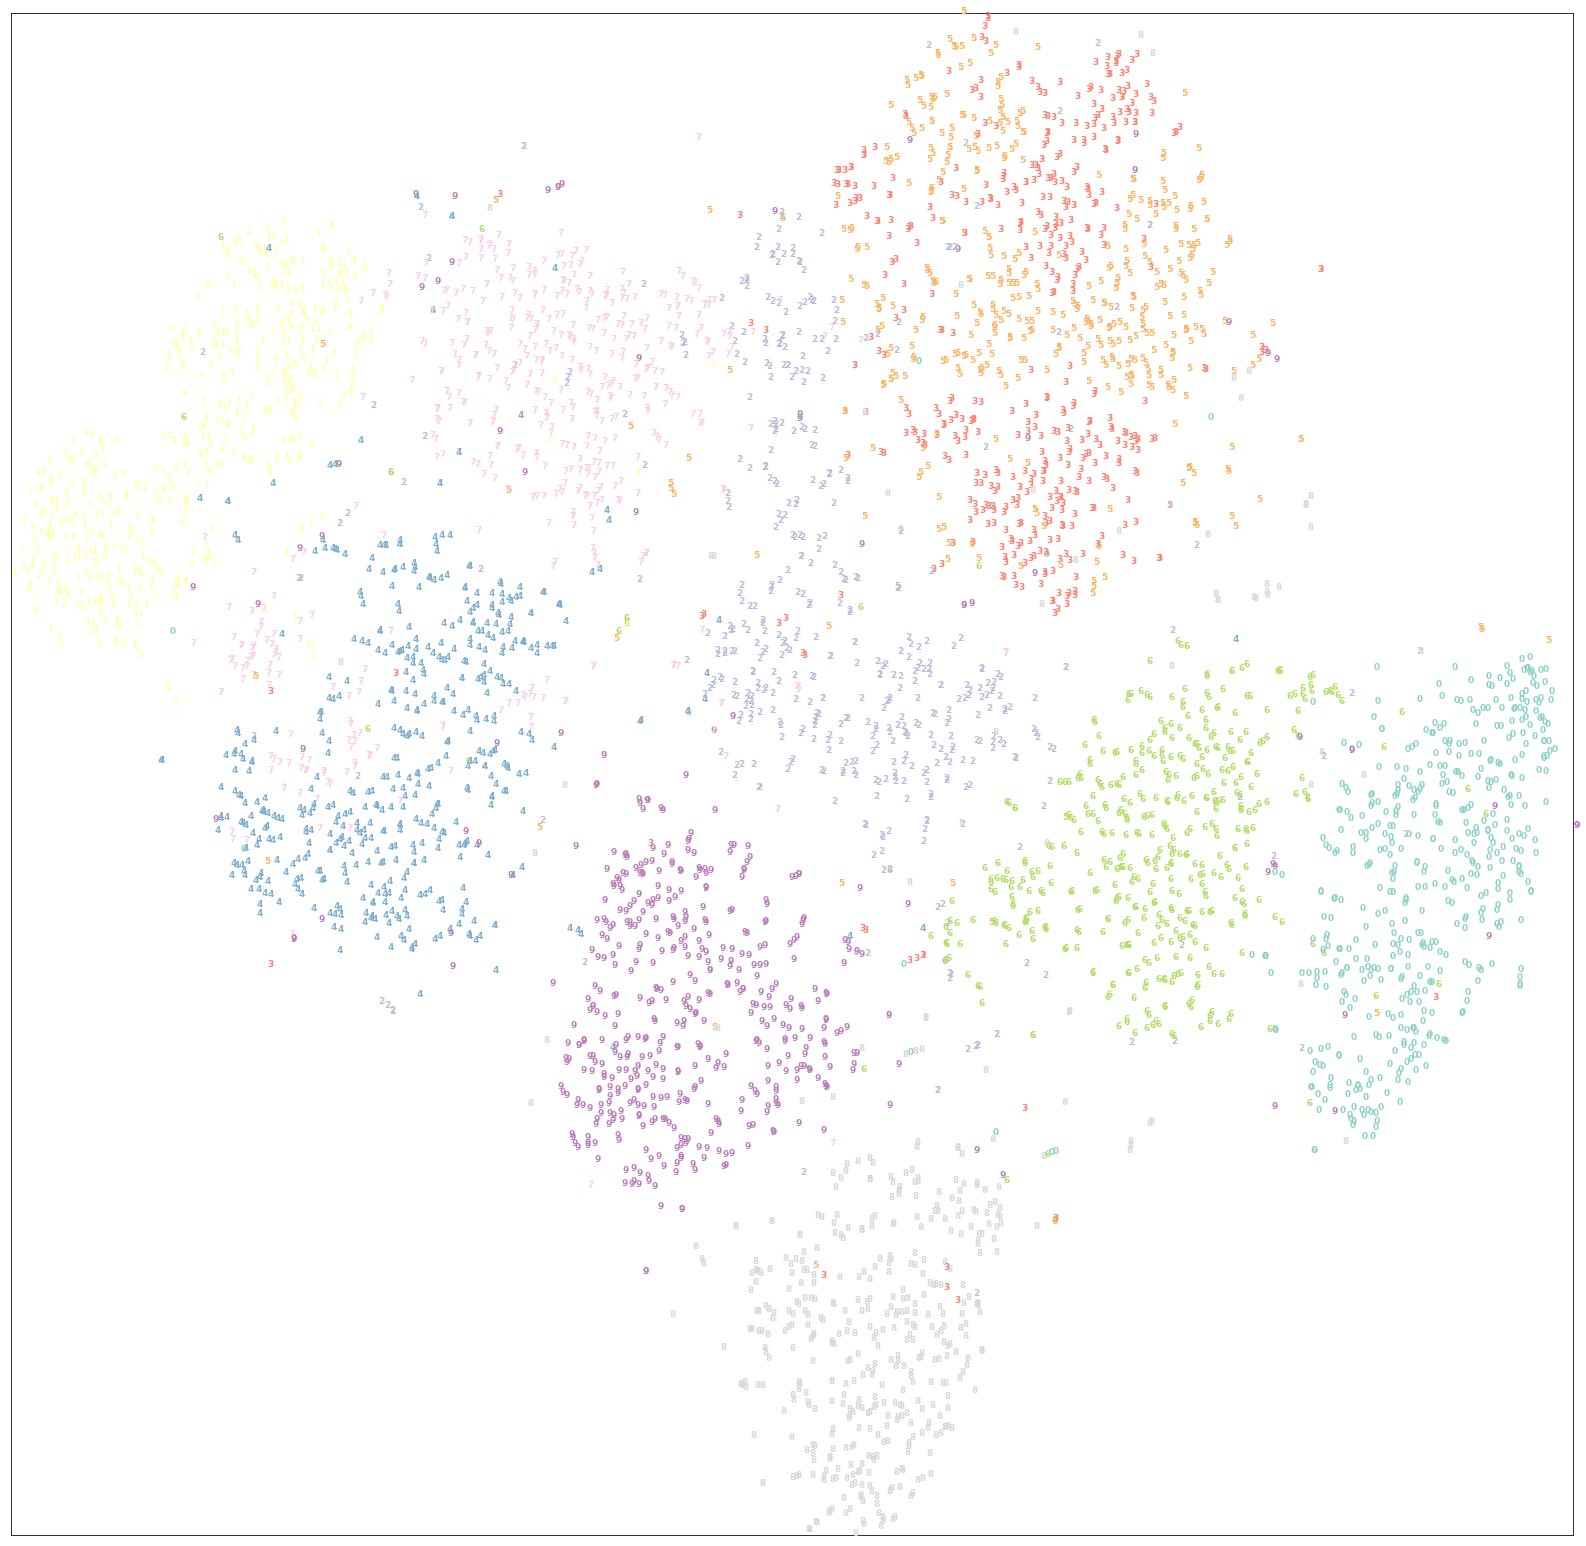

In [0]:
def feature_visilization(features,labels):

    tsne = TSNE(n_components=2, init='pca', random_state=501)
    X_tsne = tsne.fit_transform(features)

    x_min, x_max = X_tsne.min(0), X_tsne.max(0)
    X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
    
    plt.figure(figsize=(28, 28))
    for i in range(len(X_norm)):
        #print(type(X_norm[i,0]))
        #print(X_norm[i,0])
        plt.text(float(X_norm[i, 0]), float(X_norm[i, 1]), str(int(labels[i])), color=plt.cm.Set3(int(labels[i])),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.show()
    

feature_visilization(f_train,y)

In [0]:
clf = SGDClassifier(alpha=0.01, max_iter=20, fit_intercept=True)
clf.fit(f_train, y)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=20,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
#f_test = get_features(x_test)

In [0]:
#clf.score(f_test, y_test)

In [0]:
#!free -m

In [0]:
#!dd if=/dev/zero of=/var/swapfile bs=1024 count=2048k

In [0]:
#!dd if=/dev/zero of=/var/swapfile bs=1G count=4

In [0]:
#!free -m